# MMEditing Inference Tutorial

Welcome to MMEditing! This is the official tutorial for using MMEditing inference api to predict your own image or video.

In this tutorial, you will learn how to

- Install MMEditing

- Perform inference using MMEdit inference API

- Perform inference with models of different tasks including:

&emsp; &emsp; 1. Inference of conditional model

&emsp; &emsp; 2. Inference of inpanting model

&emsp; &emsp; 3. Inference of matting model

&emsp; &emsp; 4. Inference of restoration model

&emsp; &emsp; 5. Inference of translation model

&emsp; &emsp; 6. Inference of unconditional model

&emsp; &emsp; 7. Inference of video interpolation model

&emsp; &emsp; 8. Inference of video restoration model

Let's start!

## 1. Install MMEditing

In [1]:
# Check PyTorch version
!pip3 list | grep torch

ema-pytorch             0.0.10
open-clip-torch         2.5.0
torch                   1.9.0+cu111
torchvision             0.10.0+cu111


In [5]:
# Install mmcv dependency via openmim
!pip3 install openmim
!mim install 'mmcv>=2.0.0rc1'

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.9.0/index.html


In [3]:
# Install mmediting from source
!git clone -b 1.x https://github.com/open-mmlab/mmediting.git
%cd mmediting
!pip3 install -e .

Cloning into 'mmediting'...
remote: Enumerating objects: 18482, done.
remote: Counting objects: 100% (43/43), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 18482 (delta 15), reused 3 (delta 0), pack-reused 18439
Receiving objects: 100% (18482/18482), 10.21 MiB | 36.00 KiB/s, done.
Resolving deltas: 100% (12504/12504), done.
Checking out files: 100% (1280/1280), done.
/mnt/petrelfs/liuwenran/develop/mmediting/demo/mmediting
Obtaining file:///mnt/petrelfs/liuwenran/develop/mmediting/demo/mmediting
  Preparing metadata (setup.py) ... done
  Running setup.py develop for mmedit


In [8]:
# Check MMEditing installation
import mmedit
print(mmedit.__version__)

1.0.0rc3


## 2. Perform inference with MMEditing API

### 2.1 Prepare some images or videos for inference

Before we start to perform inference with a pretrained model, some input images or videos should be prepared. 

Take image translation for example. We need a input image to be translated.

We have prepared some images and videos for you, which could be downloaded from here(need a link here).

Put your image to some directory and make a directory to save processed image.


In [3]:
# make a dir for input image and output image
!mkdir -p ./../resources/input/translation
!mkdir -p ./../resources/output/translation

# put your image to input dir or download our prepared image
!cd ./../resources/input/translation
# wget link

### 2.2 Perform inference with two lines of python code. 

There are two steps:

First, create a MMEdit instance by a pretrained model name.

Second, infer your own image with this MMEdit instance. The translated image will be saved to result_out_dir.

In [10]:
from mmedit.edit import MMEdit

# Create a MMEdit instance
editor = MMEdit('pix2pix')
# Infer a image. Input image path and output image path is needed.
results = editor.infer(img='../resources/input/translation/gt_mask_0.png', result_out_dir='../resources/output/translation/tutorial_translation_res.jpg')

http loads checkpoint from path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


You could see your result image by plotting it out.

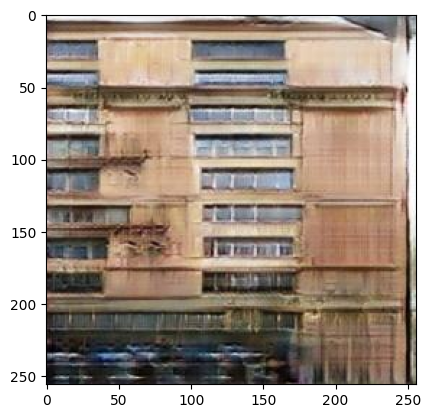

In [11]:
# plot the result image
import mmcv
import matplotlib.pyplot as plt 
img = mmcv.imread('../resources/output/translation/tutorial_translation_res.jpg')
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

## 3. Infer with models of different tasks

There are multiple task types in MMEditing: conditional, inpainting, matting, restoration, translation, unconditional, video_interpolation, video_restoration. 

We provide some models for each task. All available models and tasks could be printed out like this.

In [2]:
from mmedit.edit import MMEdit

# print all available models for inference.
inference_supported_models = MMEdit.get_inference_supported_models()
print('all available models:')
print(inference_supported_models)

# print all available tasks for inference.
supported_tasks = MMEdit.get_inference_supported_tasks()
print('all available models:')
print(supported_tasks)

# print all available models for one task, take image translation for example.
task_supported_models = MMEdit.get_task_supported_models('translation')
print('translation models:')
print(task_supported_models)

all available models:
['biggan', 'styleganv1', 'gca', 'aot_gan', 'pix2pix', 'esrgan', 'basicvsr', 'flavr']
all available models:
['unconditional', 'matting', 'inpainting', 'video_interpolation', 'conditional', 'restoration', 'video_restoration', 'translation']
translation models:
['pix2pix']


### 3.1 Inference of conditional models

Conditional models take a label as input and output a image. We take 'biggan' as an example.

/mnt/petrelfs/liuwenran/miniconda3/envs/py38pt19cu111/lib/python3.8/site-packages/mmcv/cnn/bricks/conv_module.py:153: UserWarning: Unnecessary conv bias before batch/instance norm
  warnings.warn(


http loads checkpoint from path: https://download.openmmlab.com/mmgen/biggan/biggan_cifar10_32x32_b25x2_500k_20210728_110906-08b61a44.pth


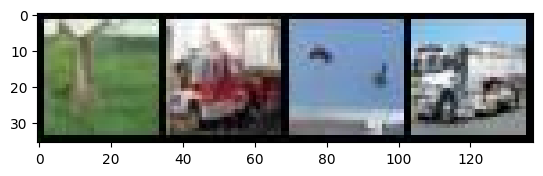

In [14]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
result_out_dir = '../resources/output/conditional/tutorial_conditional_res.jpg'
editor = MMEdit('biggan')
results = editor.infer(label=1, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.2 Inference of inpainting models

Inpaiting models take a masked image and mask pair as input, and output a inpainted image. We take 'aot_gan' as an example.

http loads checkpoint from path: https://openmmlab-share.oss-cn-hangzhou.aliyuncs.com/mmediting/inpainting/aot_gan/AOT-GAN_512x512_4x12_places_20220509-6641441b.pth


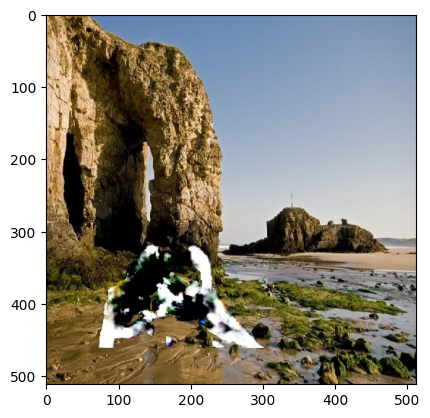

In [15]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/inpainting/img_resized.jpg'
mask = '../resources/input/inpainting/mask_2_resized.png'
result_out_dir = '../resources/output/inpainting/tutorial_inpainting_res.jpg'
editor = MMEdit('aot_gan')
results = editor.infer(img=img, mask=mask, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.3 Inference of matting models

Inpaiting models take a image and trimap pair as input, and output a alpha image. We take 'gca' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmediting/mattors/gca/baseline_r34_4x10_200k_comp1k_SAD-34.61_20220620-96f85d56.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: data_preprocessor.mean, data_preprocessor.std



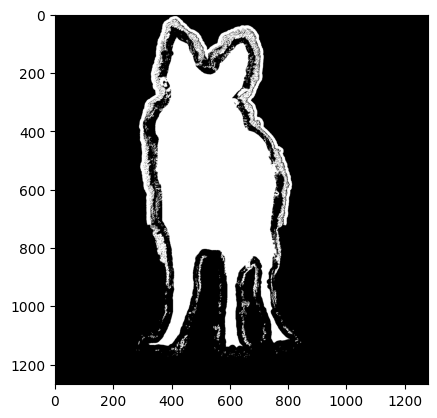

In [19]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/matting/beach_fg.png'
trimap = '../resources/input/matting/beach_trimap.png'
result_out_dir = '../resources/output/matting/tutorial_matting_res.png'
editor = MMEdit('gca')
results = editor.infer(img=img, trimap=trimap, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.4 Inference of restoration models

Restoration models take a image as input, and output a restorated image. We take 'esrgan' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmediting/restorers/esrgan/esrgan_psnr_x4c64b23g32_1x16_1000k_div2k_20200420-bf5c993c.pth


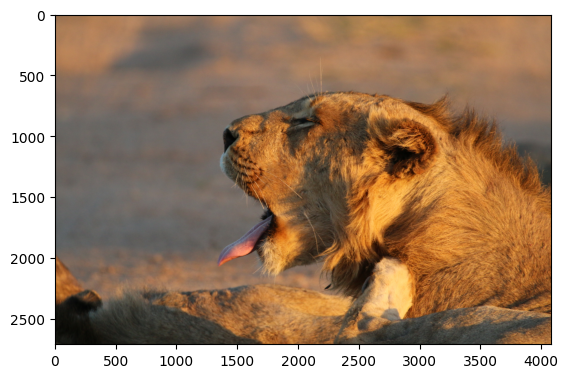

In [20]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/restoration/0901x2.png'
result_out_dir = '../resources/output/restoration/tutorial_restoration_res.png'
editor = MMEdit('esrgan')
results = editor.infer(img=img, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.5 Inference of translation models

Translation models take a image as input, and output a translated image. We take 'pix2pix' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmgen/pix2pix/refactor/pix2pix_vanilla_unet_bn_1x1_80k_facades_20210902_170442-c0958d50.pth


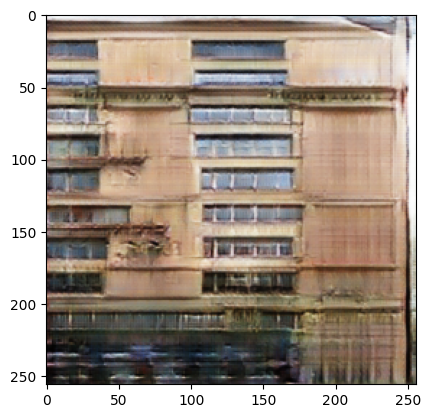

In [22]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
img = '../resources/input/translation/gt_mask_0.png'
result_out_dir = '../resources/output/translation/tutorial_translation_res.png'
editor = MMEdit('pix2pix')
results = editor.infer(img=img, result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.6 Inference of unconditional models

Unconditional models do not need input, and output a image. We take 'styleganv1' as an example.

http loads checkpoint from path: https://download.openmmlab.com/mmgen/styleganv1/styleganv1_ffhq_256_g8_25Mimg_20210407_161748-0094da86.pth
Switch to evaluation style mode: single
Switch to evaluation style mode: single


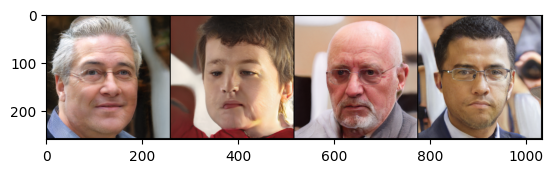

In [23]:
import mmcv
import matplotlib.pyplot as plt 
from mmedit.edit import MMEdit

# Create a MMEdit instance and infer
result_out_dir = '../resources/output/unconditional/tutorial_unconditional_res.png'
editor = MMEdit('styleganv1')
results = editor.infer(result_out_dir=result_out_dir)

# plot the result image
img = mmcv.imread(result_out_dir)
plt.imshow(mmcv.bgr2rgb(img))
plt.show()

### 3.7 Inference of video_interpolation models

Video_interpolation models take a video as input, and output a interpolated video. We take 'flavr' as an example.

In [32]:
import mmcv
import matplotlib.pyplot as plt 
import os
from mmedit.edit import MMEdit
from mmengine import mkdir_or_exist

# Create a MMEdit instance and infer
video = '../resources/input/video_interpolation/v_Basketball_g01_c01.avi'
result_out_dir = '../resources/output/video_interpolation/tutorial_video_interpolation_res.avi'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMEdit('flavr')
results = editor.infer(video=video, result_out_dir=result_out_dir)

http loads checkpoint from path: https://download.openmmlab.com/mmediting/video_interpolators/flavr/flavr_in4out1_g8b4_vimeo90k_septuplet_20220509-c2468995.pth
[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 35/35, 0.2 task/s, elapsed: 168s, ETA:     0sOutput dir: ../resources/output/video_interpolation/tutorial_video_interpolation_res.avi
11/17 21:40:25 - mmengine - INFO - Visualization is implemented in forward process.
11/17 21:40:25 - mmengine - INFO - Postprocess is implemented in forward process.


Please check the result video in the output directory.

### 3.8 Inference of video_restoration models

Video_restoration models take a video as input, and output a restorated video. We take 'basicvsr' as an example..

In [28]:
import mmcv
import matplotlib.pyplot as plt 
import os
from mmedit.edit import MMEdit
from mmengine import mkdir_or_exist

# Create a MMEdit instance and infer
video = '../resources/input/video_restoration/v_Basketball_g01_c01.avi'
result_out_dir = '../resources/output/video_restoration/tutorial_video_restoration_res.avi'
mkdir_or_exist(os.path.dirname(result_out_dir))
editor = MMEdit('basicvsr')
results = editor.infer(video=video, result_out_dir=result_out_dir)

11/17 21:09:41 - mmengine - INFO - local loads checkpoint from path: /mnt/lustre/liuwenran/.cache/openmmlab/mmedit/spynet_20210409-c6c1bd09.pth
http loads checkpoint from path: https://download.openmmlab.com/mmediting/restorers/basicvsr/basicvsr_reds4_20120409-0e599677.pth
The model and loaded state dict do not match exactly

missing keys in source state_dict: step_counter

11/17 21:12:44 - mmengine - INFO - Postprocess is implemented in visualize process.


Please check the result video in the output directory.